In [1]:
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
import cv2

model = YOLO("models/nano/best.pt")

In [2]:
image_path = 'images/test.jpg'
real_image = cv2.imread(image_path)

In [3]:
results = model(real_image)


0: 448x640 5 faces, 345.7ms
Speed: 21.9ms preprocess, 345.7ms inference, 85.4ms postprocess per image at shape (1, 3, 448, 640)


In [4]:
res_plotted = results[0].plot()

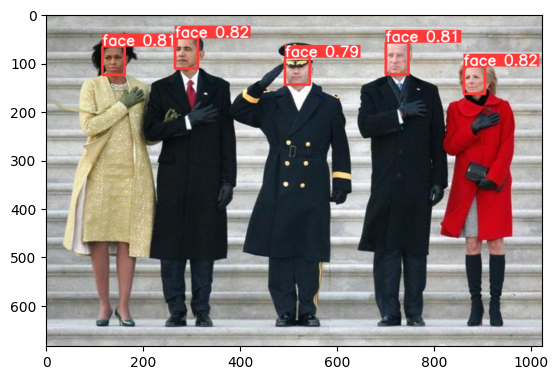

In [5]:
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
cap = cv2.VideoCapture('images/video.mp4')

if (cap.isOpened()== False):
    print("Error opening video file")

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        results = model(frame)
        res_plotted = results[0].plot()        
        
        cv2.imshow('Frame', res_plotted)
        
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()